In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/housing_data-processed.csv')
data.sample(5)

,transaction year,house age,distance to the nearest MRT station,convenience stores close by,latitude,longitude,house price of unit area
28,2013,19,383,8,24.97200,121.54477,48.1
341,2013,8,104,5,24.96674,121.54067,42.8
235,2013,32,1156,0,24.94935,121.53046,12.8
134,2012,31,600,5,24.96871,121.54651,30.9
269,2012,1,23,7,24.96772,121.54102,47.7


#### Multiple Linear Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[['transaction year','house age', 'distance to the nearest MRT station', 'convenience stores close by', \
          'latitude', 'longitude']]
Y = data['house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

print('Training score: ', linear_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5670875324320471
Testing score:  0.6453075066896737


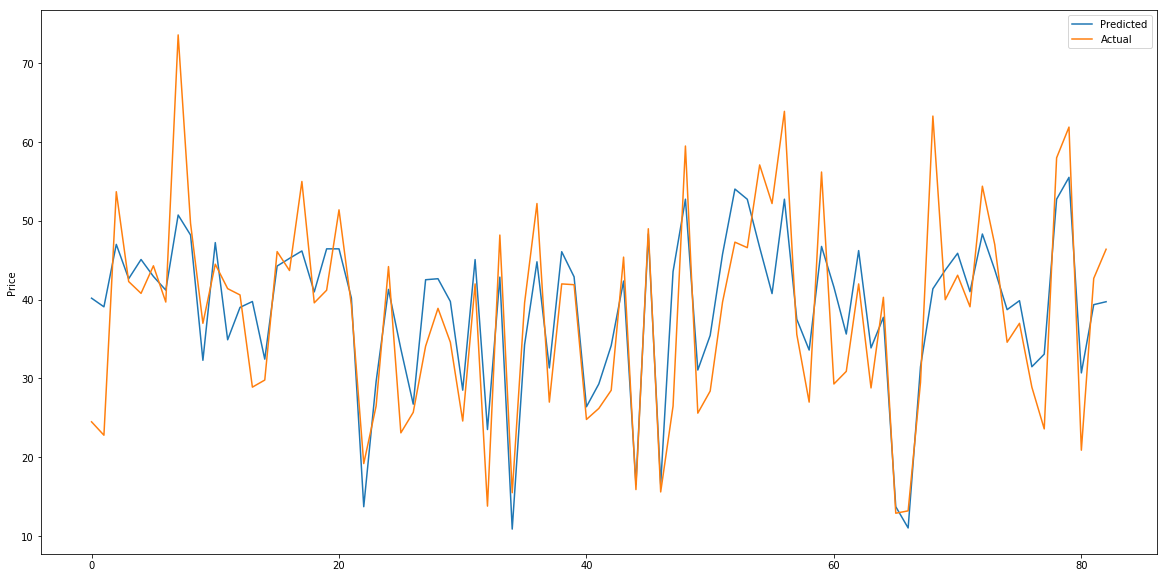

In [16]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Price')

plt.legend()
plt.show()

#### Decision Tree Model

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data[['transaction year','house age', 'distance to the nearest MRT station', 'convenience stores close by', \
          'latitude', 'longitude']]

Y = data['house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

DecisionTreeRegressor_model = DecisionTreeRegressor(random_state=1).fit(x_train, y_train)

y_pred = DecisionTreeRegressor_model.predict(x_test)

print('Training score: ', DecisionTreeRegressor_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.9795100826218508
Testing score:  0.28421162896723373


In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

6.094297188755021

#### Tuning the model (overfitting vs. underfitting)

In [8]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    preds_val = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [9]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max Leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

Max Leaf nodes: 5 		 Mean Absolute Error: 6
Max Leaf nodes: 50 		 Mean Absolute Error: 6
Max Leaf nodes: 500 		 Mean Absolute Error: 6
Max Leaf nodes: 5000 		 Mean Absolute Error: 6


In [10]:
scores = {leaf_size: get_mae(leaf_size, x_train, x_test, y_train, y_test) for leaf_size in [5, 50, 500, 5000]}

best_tree_size = min(scores, key=scores.get)
print(best_tree_size)

50


In [11]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)

print('Training score: ', final_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.9352449052428655
Testing score:  0.29273947468933315


#### Random Forrest

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data[['transaction year','house age', 'distance to the nearest MRT station', 'convenience stores close by', \
          'latitude', 'longitude']]

Y = data['house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rf_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print('Training score: ', rf_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.9373871029614294
Testing score:  0.6624702276203729
